In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
lc=LabelEncoder()

In [8]:
df['species']=lc.fit_transform(df['species'])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [17]:
x=df.iloc[:,:4]

In [18]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
y=df.species

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=5)

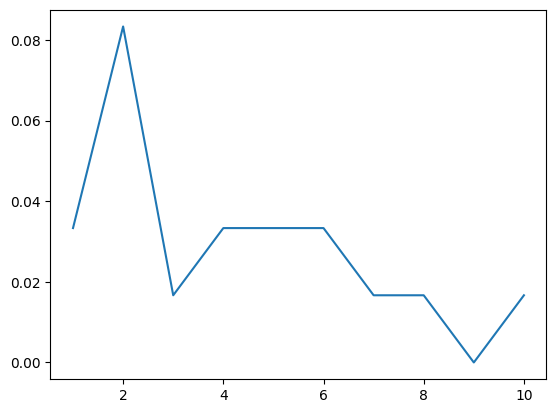

In [20]:
wcss=[]
k=range(1,11)
for i in k:
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_train,y_train)
  wcss.append(1-model.score(x_test,y_test))
plt.plot(k,wcss)

In [21]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_train,y_train)
model.score(x_test,y_test)

0.9833333333333333

#KMeans

In [23]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

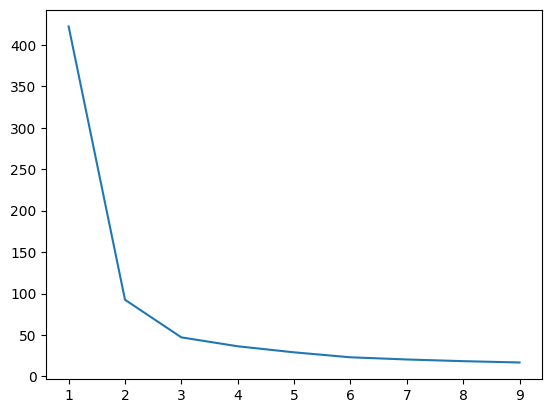

In [24]:
wcss=[]
k=range(1,10)
for i in k:
  km=KMeans(n_clusters=i)
  km.fit_predict(x_train)
  wcss.append(km.inertia_)
plt.plot(k,wcss)

In [25]:
km=KMeans(n_clusters=3)
clusters=km.fit_predict(x)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [26]:
km.score(x_test,y_test)

-31.553181791820037

#S algorithm

In [31]:
def findsalgo(df):
  hypo=['O']*(len(df[0])-1)
  for data in df:
    if data[-1]=='Yes':
      for i in range(len(data)-1):
        if hypo[i]=='0':
          hypo[i]=data[i]
        elif hypo[i]!=data[i]:
          hypo[i]='?'
  return hypo

training_data=[
    ['Sunny','Warm','Normal','Strong','Warm','Same','Yes'],
    ['Sunny','Warm','High','Strong','Warm','Same','Yes'],
    ['Rainy','Cold','Strong','Warm','Change','No'],
    ['Sunny','Warm','High','Strong','Cool','Change','Yes']
]

hypothesis = findsalgo(training_data)
print('final hypothesis: ',hypothesis)

final hypothesis:  ['?', '?', '?', '?', '?', '?']


#Naive-Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb=GaussianNB()
model=nb.fit(x_train,y_train)
model.score(x_test,y_test)

0.9666666666666667

#Linear Regression

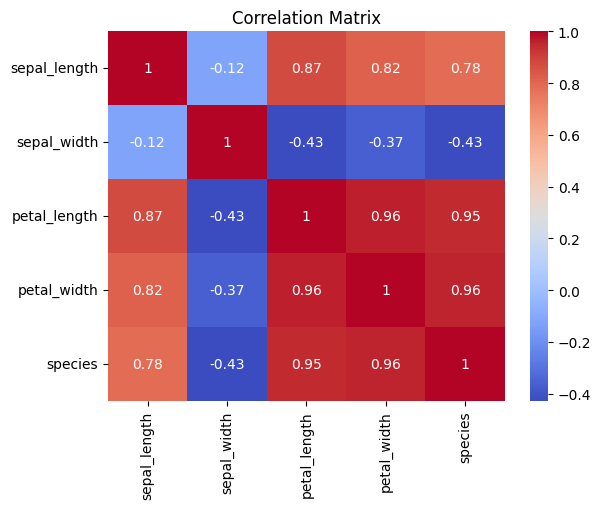

In [34]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#linear regression

In [39]:
d=pd.read_csv('homeprices_2.csv')

In [40]:
d.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


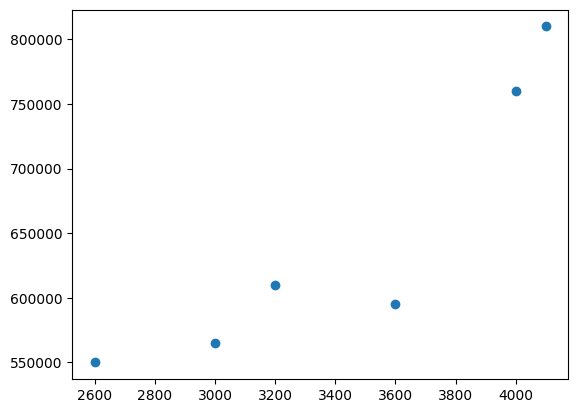

In [68]:
plt.scatter(d.area,d.price)

In [58]:
x=d.iloc[:,0:3]
y=d.area

In [59]:
x.head()

,area,bedrooms,age
0,2600,3,20
1,3000,4,15
2,3200,3,18
3,3600,3,30
4,4000,5,8


In [60]:
y.head()

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
x_t,x_ts,y_t,y_ts=train_test_split(x,y,test_size=0.2,random_state=2)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr=LinearRegression()

In [64]:
lr.fit(x_t,y_t)

LinearRegression()

In [65]:
x_t

,area,bedrooms,age
3,3600,3,30
2,3200,3,18
5,4100,6,8
0,2600,3,20


In [53]:
y_t

3    3600
2    3200
5    4100
0    2600
Name: area, dtype: int64

In [54]:
lr.predict(x_t.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3600.])

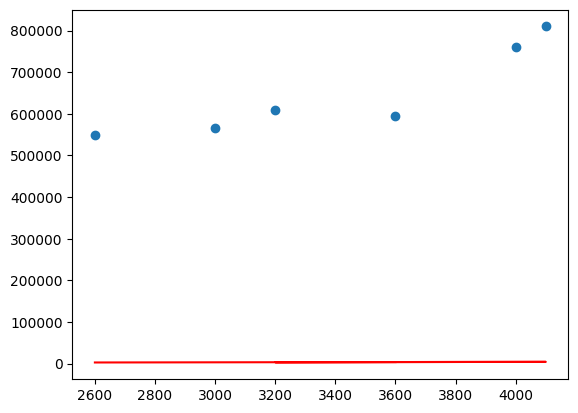

In [55]:
plt.scatter(d.area,d.price)
plt.plot(x_t,lr.predict(x_t),color='red')

In [70]:
x=d[['area','bedrooms','age']]

In [76]:
y=d.price

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model=LinearRegression()

In [79]:
model.fit(x,y)

LinearRegression()

In [80]:
model.coef_

array([  119.67905405, 13097.24903475, -4207.28764479])

In [81]:
b=model.intercept_

In [82]:
b

256461.14864864858

In [83]:
model.score(x,y)

0.9534350855214517